In [ ]:
'''
Notes:

Predict both appliances and lights (зачем? давай только для appliances)




A GENERAL SCHEME FOR AN EMPIRICAL APPLICATION

1) DEFINE THE AIM(S) OF THE ANALYSIS (RESEARCH QUESTION): the more detailed, the better.


3) PROVIDE A LITERATURE REVIEW, in order to understand the main findings already available in the scientific community and prepare the expected results or relationships.

The paper "Data driven prediction models of energy use of appliances in a low-energy house" is the source of dataset.


2) DO SOME DESCRIPTIVE ANALYSIS, in order to understand the main features of the dataset, 
the presence of some errors or missing values, and so on. 
The researcher may improve the dataset adding information from external sources (i.e. the dataset contains data from many countries, so country-specific information like GDP or population characteristics, carried out from Eurostat or OECD, can be added).

Make plots from the Medium article - key insights about the data 
(Appliances time series Wh consumption, Appliances histogram distribution, e.t.c)

Linear model is not enough (appliances don't correspond to any other fieature linearly)



4) CHOOSE THE STATISTICAL MODEL/APPROACH FOR THE ANALYSIS, according to the main findings of points 2 and 3 above, as well as the goal(s) of the work.

which models I choose?
Linear, Neural Network, Gradient Boosting (as in paper, but tuned better as in medium), TODO(check with the course)

TODO: investigate arch, garch, arima and other models from the course (can i apply them to my problem? if no - why)

5) ESTIMATE THE MODEL.


6) REPORT AND INTERPRET THE RESULTS.


7) HIGHLIGHT THE MAIN CONCLUSIONS / PRACTICAL SUGGESTIONS.

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [28]:
sns.set(color_codes=True)

In [2]:
data = pd.read_csv("./energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# Data visualization

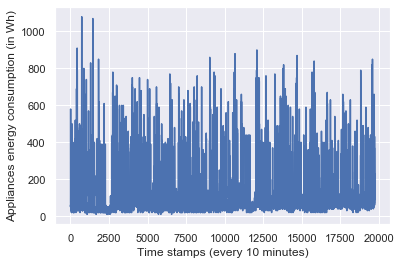

In [31]:
plt.plot(list(range(len(data['Appliances']))), data['Appliances'])
plt.xlabel('Time stamps (every 10 minutes)') 
plt.ylabel('Appliances energy consumption (in Wh)') 
plt.show()

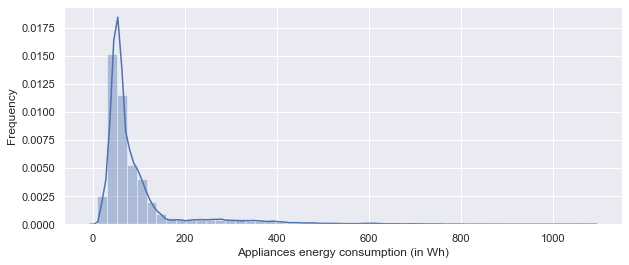

In [47]:
fig = plt.figure(figsize=(10, 4))
plt.xlabel("Appliances energy consumption (in Wh)")
plt.ylabel("Frequency")

sns.distplot(list(data['Appliances']), bins = 50)

In [ ]:
# Data transformation (add Weekday for example)
# Здесь также показать графики для викендов и викдеев (обоснование добавления колонки WEEKDAY)

In [ ]:
# We can use ARMA model because the data is stationary